#### K-평균 알고리즘 순서
1. 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓음.
2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속됨.
3. 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동함.
4. 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경.
5. 다시 중심을 소속된 데이터의 평균 중심으로 이동.
6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료. 그렇지 않다면 다시 4번 과정을 거쳐서 소속을 변경하고 이 과정을 반복.

#### K-평균의 장점
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘임.
- 알고리즘이 쉽고 간결

#### K-평균의 단점
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐(이를 위해 PCA로 차원 감소를 적용해야 할 수도 있음)
- 반복을 수행하는데, 반복 횟수가 많을수록 수행 시간이 매우 느려짐.
- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어려움.

## 사이킷런 KMeans 클래스 소개
KMeans 클래스는 다음과 같은 초기화 파라미터를 가지고 있음.

In [ ]:
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                            precompute_distances='auto', verbose=0, random_state=None,
                            copy_x=True, n_jobs=1, algorithm='auto')

#### 중요 파라미터
- n_clusters: 가장 중요한 파라미터. 군집화할 개수, 즉 군집 중심점의 개수를 의미
- init: 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정함.
- max_iter: 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료함.

#### 주요 속성
- labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_: 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 가능.

## K-평균을 이용한 붓꽃 데이터 세트 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


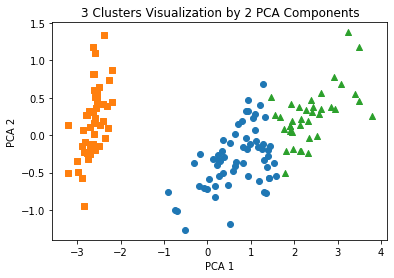

In [6]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

## 군집화 알고리즘 테스트를 위한 데이터 생성
군집화용 데이터 생성기 API: make_blobs(), make_classification() 등. make_blobs()는 개별 군집의 중심점과 표준 편차 제어 기능이 있음, make_classification()은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있음.

#### make_blobs()의 호출 파라미터들
- n_samples: 생성할 총 데이터의 개수. 디폴트는 100개.
- n_features: 데이터의 피처 개수. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처는 y 좌표상에 표현함.
- centers: int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타냄. ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미.
- cluster_std: 생성될 군집 데이터의 표준 편차를 의미. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어짐. [0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째, 두 번째, 세 번째 군집 내 데이터의 표준편차가 각각 0.8, 1.2, 0.6으로 만들어짐. 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용함.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


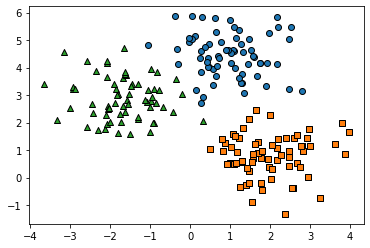

In [9]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

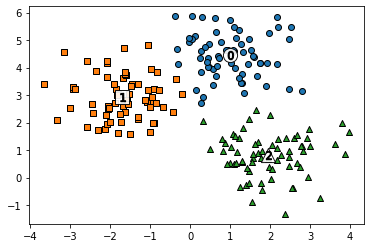

In [10]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


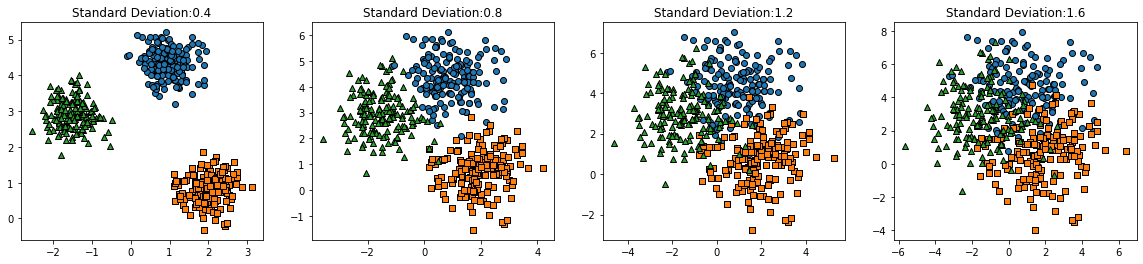

In [39]:
sdvs = [0.4, 0.8, 1.2, 1.6]

fig, axes = plt.subplots(figsize=(20, 4), nrows=1, ncols=4)

for i, sdv in enumerate(sdvs):
    ax = axes[i]
    
    X, y = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=sdv, random_state=0)
    labels = np.unique(y)
    df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
    df['label'] = y
    
    for j, label in enumerate(labels):
        ax.scatter(x=df[df['label']==label]['ftr1'], y=df[df['label']==label]['ftr2'], edgecolor='k', marker=markers[j])
    ax.set_title('Standard Deviation:{}'.format(sdv))